In [1]:
from pathlib import Path
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator

import seaborn as sns
sns.set_theme()
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
import numpy as np
from scipy.optimize import curve_fit

In [2]:
volume_df = pd.read_csv(Path(Path.home(), "Documents/xray/sample_bench/data/7mhf/187_bench_ref_10000/volume.csv"), index_col=0)
volume_df.head()

,n,field_mean,field_std,r_free_0_mean,r_free_0_std,n_out,k,job_id,N,J
0,NaN,6.089610,0.008714,0.359700,0.005537,1.0,0,0,1,1
1,NaN,6.084661,0.006870,0.357139,0.005011,2.0,0,0,1,1
2,NaN,6.082576,0.005987,0.355893,0.004672,3.0,0,0,1,1
3,NaN,6.080907,0.005207,0.355034,0.004471,4.0,0,0,1,1
4,NaN,6.080002,0.004664,0.354653,0.004343,5.0,0,0,1,1


In [3]:
minima_df = pd.read_csv(Path(Path.home(), "Documents/xray/score_bench/data/7mhf/122_native_decoys_1_state/global_min.csv"), index_col=0)
# minima_df["xray_0+xray_1"] = minima_df["xray_0"] + minima_df["xray_1"]
# minima_df["rmsd_0+rmsd_1"] = (minima_df["rmsd_0"] + minima_df["rmsd_1"])/2
# minima_df["r_free_0+r_free_1"] = (minima_df["r_free_0"] + minima_df["r_free_1"])/2

minima_df.head()

,1_1,1_2,2_1,2_2
0,6.049906,12.104932,4.025633,8.078955
1,5.638344,11.470674,4.227168,8.348225
2,6.003908,12.002634,4.054030,8.102862
3,5.978215,11.923115,4.064986,8.168346
4,5.882493,11.815050,4.093771,8.176383


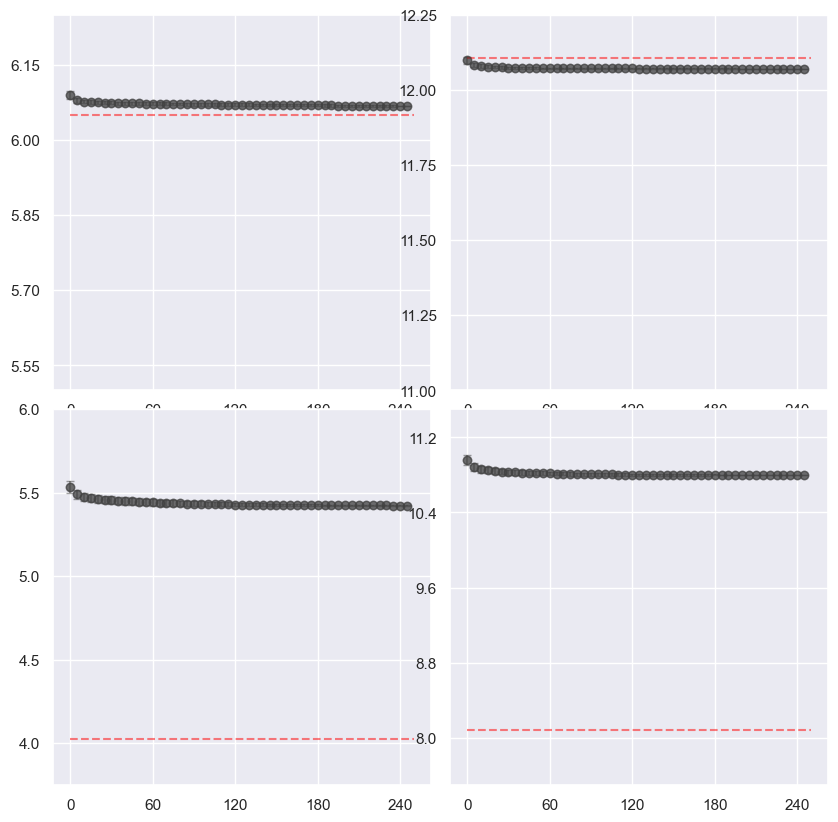

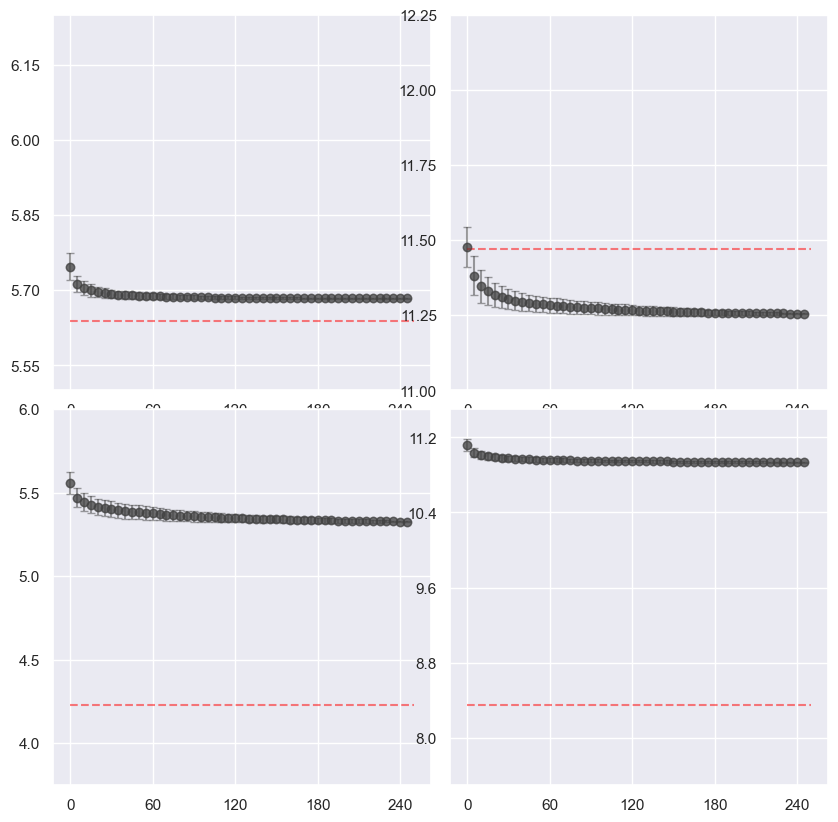

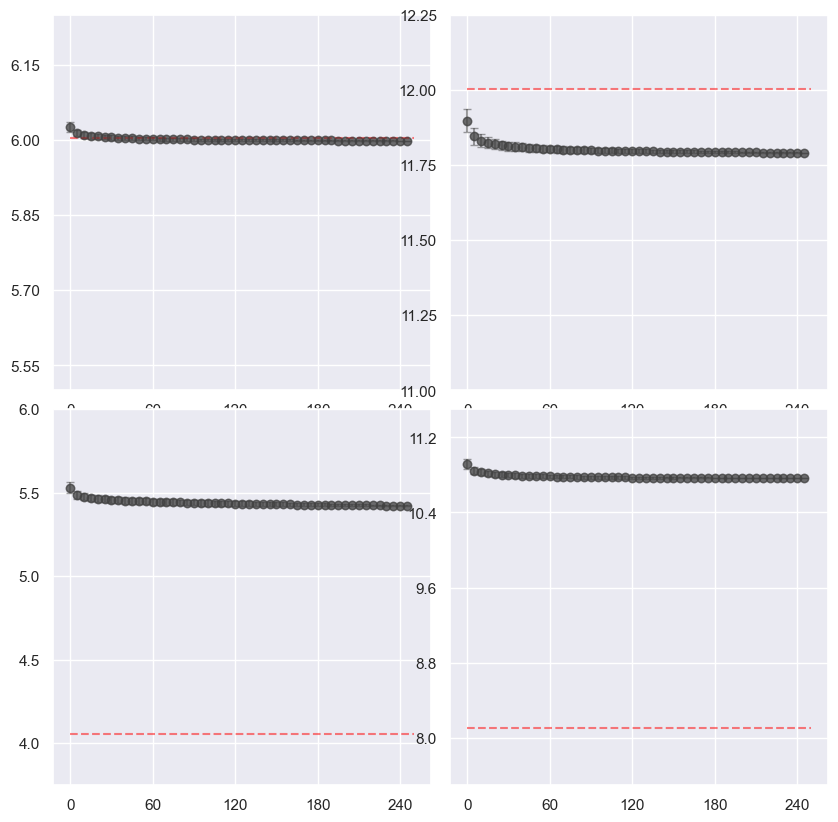

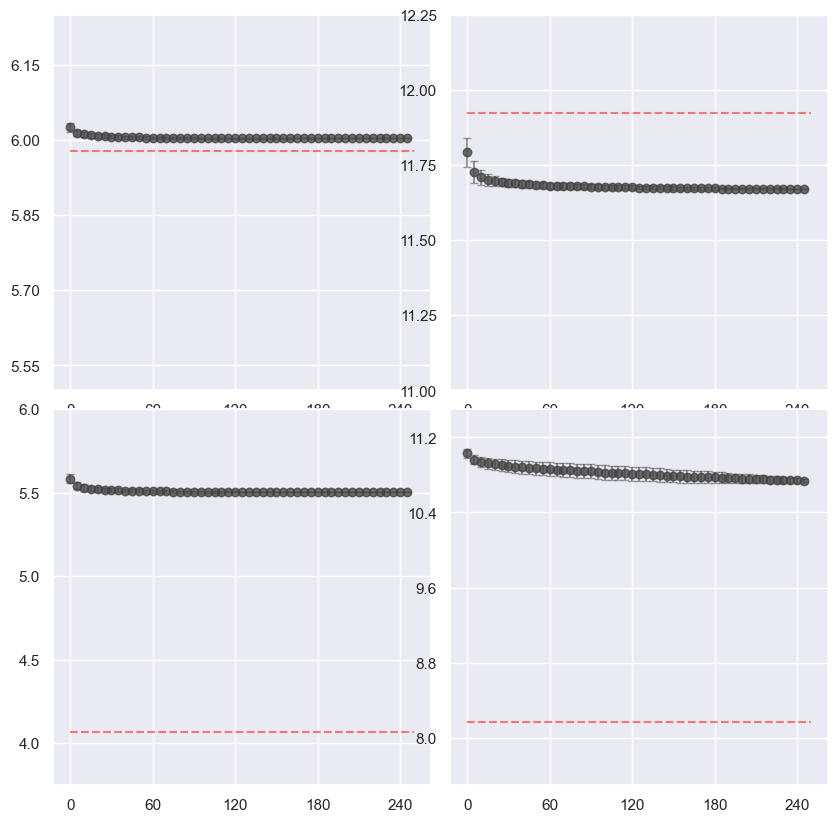

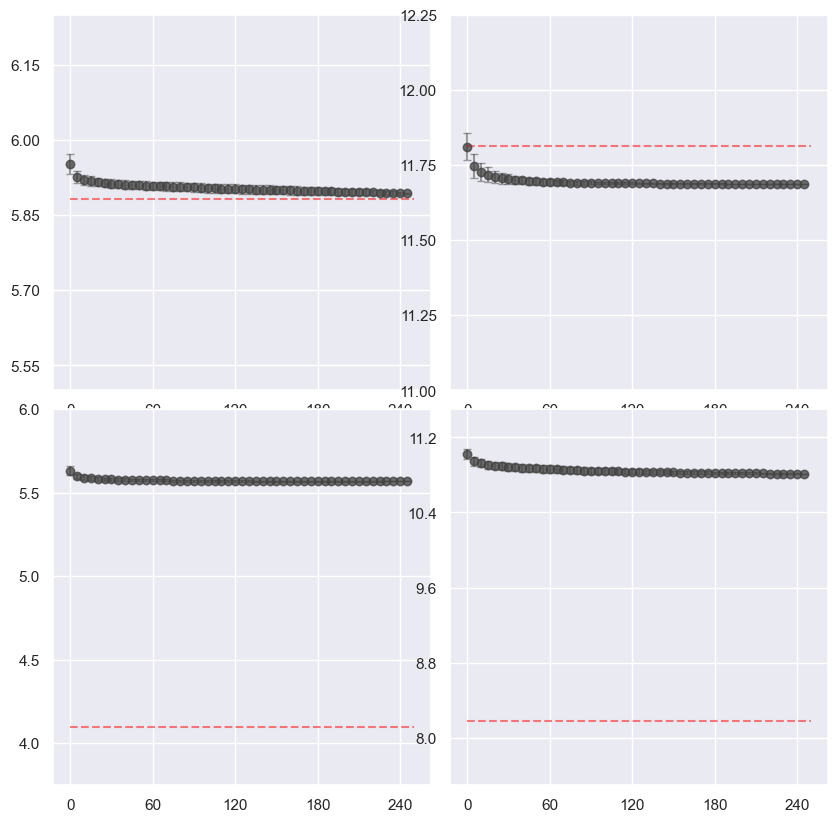

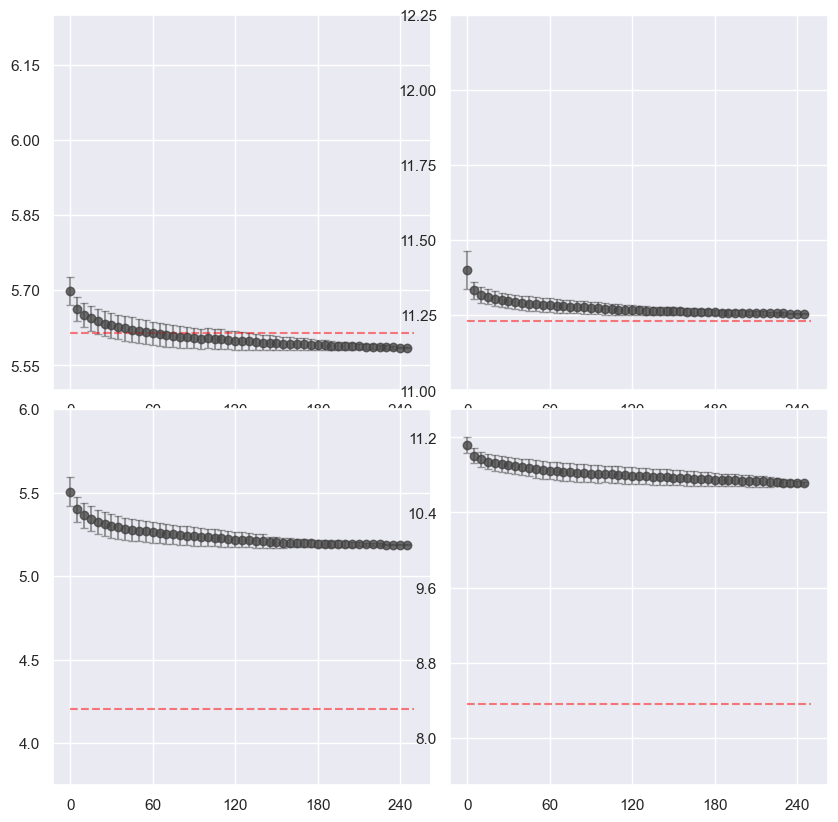

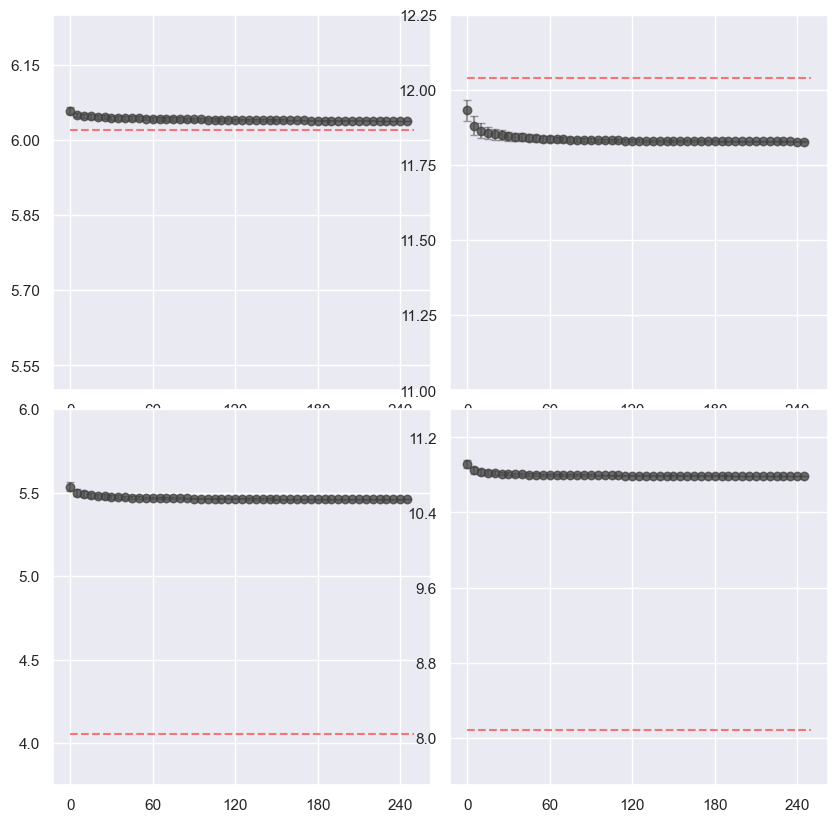

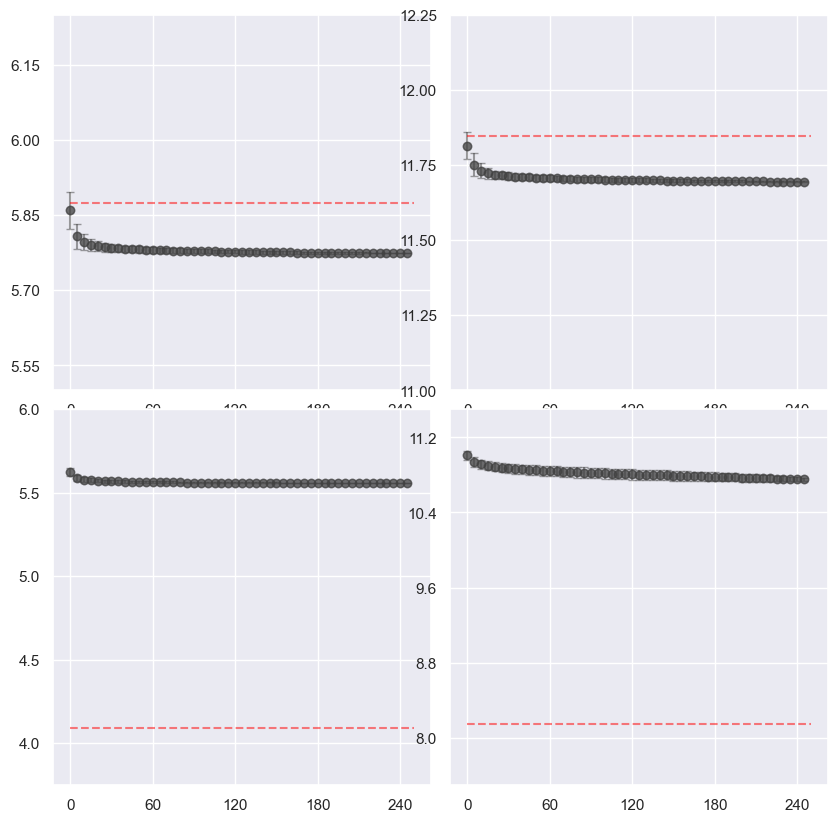

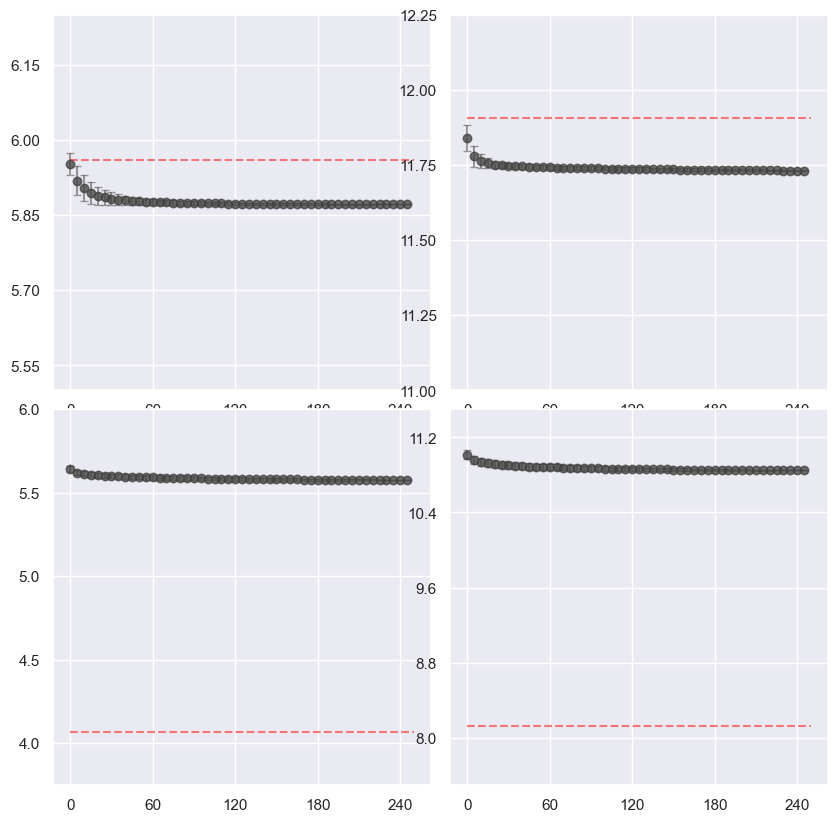

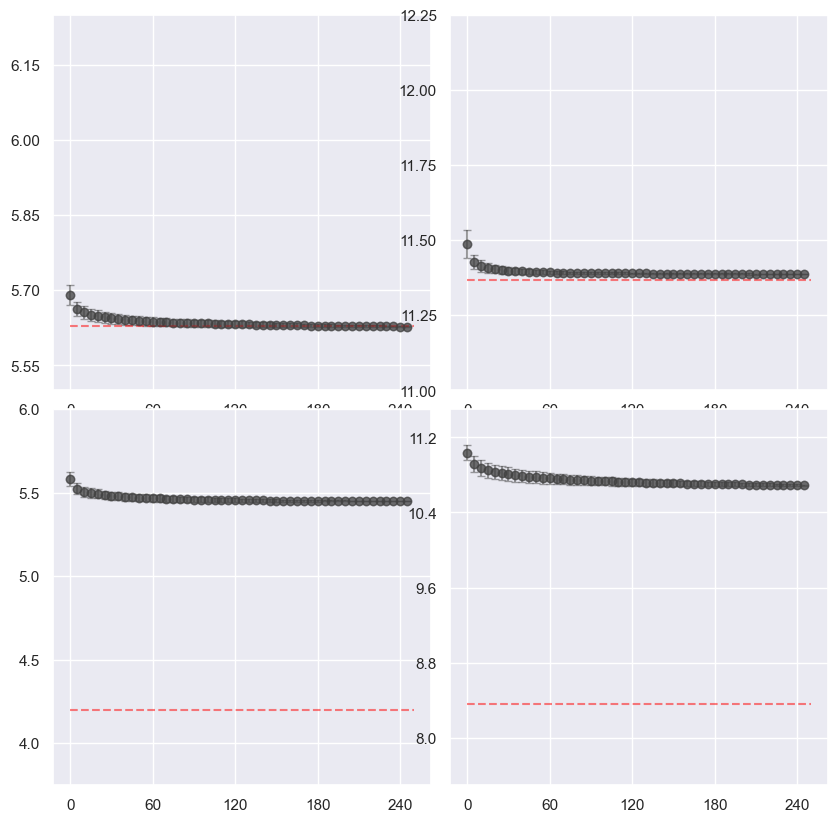

In [4]:
alpha = .5
space = 5

file_names = ["xray", "xray_rmsd", "rmsd"]


for k in range(10):

    fig, axs = plt.subplots(2, 2, figsize=(10,10))
    for N in [1, 2]:
        for J in [1, 2]:
            subset_df = volume_df[(volume_df["N"] == N) & (volume_df["J"] == J) & (volume_df["k"] == k)]

            x = list(range(250))
            y = subset_df["{}_mean".format("field")]
            std = subset_df["{}_std".format("field")]

            ax = axs[N-1,J-1]
            ax.scatter(x[::space], y[::space], c="#424242ff", alpha=alpha)
            ax.errorbar(x[::space], y[::space], std[::space], linestyle='None', marker='o', capsize=3, c="#424242ff", alpha=alpha)

            # if J == 1:
            #     native_score = natives_df.loc[0]["xray_0"]
            # else:
            #     native_score = natives_df.loc[0]["xray_0+xray_1"]

            minima = minima_df.loc[k, "{}_{}".format(N, J)]

            # if j == 0:
            #     native_score = natives_df.loc[0]["r_free_0"]
            # else:
            #     native_score = natives_df.loc[0]["r_free_0+r_free_1"]

            ax.plot([0, 250], [minima, minima], c="red", linestyle="--", alpha=alpha)

            if N == 1 and J == 1:
                ax.set_ylim(5.5, 6.25)
            elif N == 1 and J == 2:
                ax.set_ylim(11.00, 12.25)
            elif N == 2 and J == 1:
                ax.set_ylim(3.75, 6)
            elif N == 2 and J == 2:
                ax.set_ylim(7.5, 11.5)

            # ax.tick_params(bottom=False, labelbottom=False)
            # ax.tick_params(left=False, labelleft=False)
            ax.xaxis.set_major_locator(MaxNLocator(nbins=5))
            ax.yaxis.set_major_locator(MaxNLocator(nbins=5))

            plt.xlabel(None)
            plt.ylabel(None)

    plt.subplots_adjust(wspace=0.05, hspace=0.05)
    # plt.show()
    fig_file = Path(Path.home(), "Desktop/volume_{}.png".format(k))
    plt.savefig(fig_file)
        # plt.close()

        # plt.plot()

In [2]:
# exp_dir_arr = np.ndarray(shape=(4,2), dtype=Path)
# data_dir = Path(Path.home(), "Documents/xray/sample_bench/data/7mhf")
# # Synthetic benchmark score
# exp_dir_arr[0,0] = Path(data_dir, "125_natives_1_state")
# exp_dir_arr[0,1] = Path(data_dir, "145_native_1_state_2_cond")
# exp_dir_arr[1,0] = Path(data_dir, "123_natives_2_state")
# exp_dir_arr[1,1] = Path(data_dir, "124_natives_2_cond")
# exp_dir_arr[2,0] = Path(data_dir, "141_native_4_state_1_cond")
# exp_dir_arr[2,1] = Path(data_dir, "142_native_4_state_2_cond")
# exp_dir_arr[3,0] = Path(data_dir, "151_native_N8_J1")
# exp_dir_arr[3,1] = Path(data_dir, "152_native_N8_J2")

# stat_dfs_arr = np.ndarray(shape=(4,2,3,10), dtype=pd.DataFrame)
# y_fields_arr = np.ndarray(shape=(4,2,3), dtype=Path)
# for i in range(4):
#     for j in range(2):
#         if j == 0:
#             for k in range(10):
#                 stat_dfs_arr[i,j,0,k] = pd.read_csv(Path(exp_dir_arr[i,j], "volume_xray_0_{}.csv".format(k), index_col=0))
#                 stat_dfs_arr[i,j,1,k] = stat_dfs_arr[i,j,0,k]
#                 stat_dfs_arr[i,j,2,k] = pd.read_csv(Path(exp_dir_arr[i,j], "volume_rmsd_0_{}.csv".format(k), index_col=0))

#             y_fields_arr[i,j,0] = "xray_0"
#             y_fields_arr[i,j,1] = "rmsd_0"
#             y_fields_arr[i,j,2] = "rmsd_0"
#         else:
#             for k in range(10):
#                 stat_dfs_arr[i,j,0,k] = pd.read_csv(Path(exp_dir_arr[i,j], "volume_xray_0+xray_1_{}.csv".format(k), index_col=0))
#                 stat_dfs_arr[i,j,1,k] = stat_dfs_arr[i,j,0,k]
#                 stat_dfs_arr[i,j,2,k] = pd.read_csv(Path(exp_dir_arr[i,j], "volume_rmsd_0+rmsd_1_{}.csv".format(k), index_col=0))

#             y_fields_arr[i,j,0] = "xray_0+xray_1"
#             y_fields_arr[i,j,1] = "rmsd_0+rmsd_1"
#             y_fields_arr[i,j,2] = "rmsd_0+rmsd_1"


In [3]:
# def get_min_max(dfs, field):
#     all_df = pd.concat(dfs)
#     field_min = all_score_df["{}_mean".format(score_field)].min()
#     field_max = all_score_df["{}_mean".format(score_field)].max()

#     return field_min, field_max


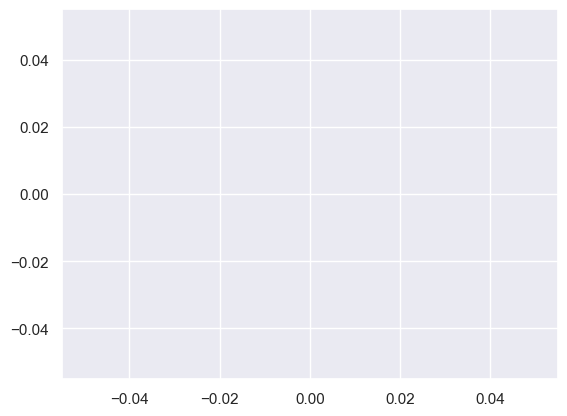

In [4]:
alpha = .5
space = 20

file_names = ["xray", "xray_rmsd", "rmsd"]

for i in range(4):
    for j in range(2):
        for plot_id in range(3):
            fig, axs = plt.subplots(2, 5, figsize=(25,8))

            for k in range(10):
                stat_df = stat_dfs_arr[i,j,plot_id,k]
                ax = axs[k//5][k%5]

                x = stat_df.index
                y = stat_df["{}_mean".format(y_fields_arr[i,j,plot_id])]
                std = stat_df["{}_std".format(y_fields_arr[i,j,plot_id])]

                ax.scatter(x[::space], y[::space], c="#424242ff", alpha=alpha)
                ax.errorbar(x[::space], y[::space], std[::space], linestyle='None', marker='o', capsize=3, c="#424242ff", alpha=alpha)

            fig_file = Path(Path.home(), "Desktop/volume_{}_{}_{}.png".format(file_names[plot_id],i,j))
            plt.savefig(fig_file)
            plt.close()

            plt.plot()

In [5]:
fig, axs = plt.subplots(3, 2, figsize=(12,15))

fig_file = Path(Path.home(), "Desktop/volume.png".format(i,j))

space = 50
for i in range(3):
    for j in range(2):
        ax = axs[i][j]

        ax.tick_params(axis='x', labelsize=40)
        ax.tick_params(axis='y', labelsize=40)

        ax.xaxis.set_major_locator(ticker.MaxNLocator(3))
        ax.yaxis.set_major_locator(ticker.MaxNLocator(3))

        def two_decimal_places(x, pos):
            return f'{x:.2f}'
        ax.yaxis.set_major_formatter(FuncFormatter(two_decimal_places))


        stat_df = stat_dfs_arr[i,j,0,0]

        x = stat_df.index
        y = stat_df["{}_mean".format(y_fields_arr[i,j,0])]
        std = stat_df["{}_std".format(y_fields_arr[i,j,0])]

        ax.scatter(x[::space], y[::space], c="#424242ff", s=50, alpha=1)
        ax.errorbar(x[::space], y[::space], std[::space], linestyle='None', marker='o', elinewidth=3, capsize=10, c="#424242ff", alpha=1)

        # ax.set_aspect('equal', 'box')  # Ensure the aspect ratio is equal to make subplots square


plt.tight_layout()
plt.savefig(fig_file)
plt.close()
